Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
[[21  0]
 [ 0 19]]


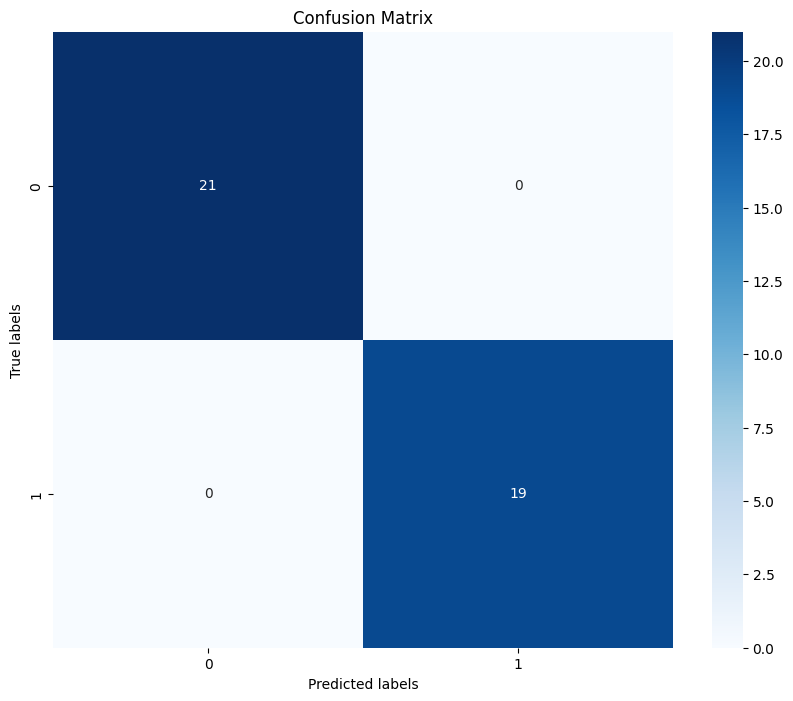

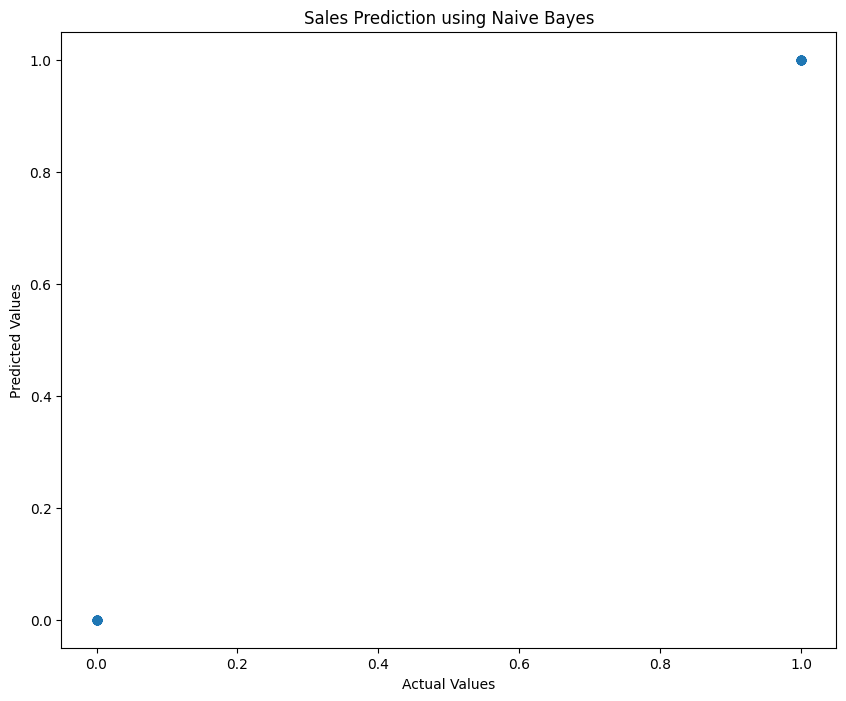

In [ ]:
                                                                     Sales Prediction -Task 4


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

# Load the sales data
data = pd.read_csv('advertising.csv')

# Preprocess the data
X = data.drop(['Sales'], axis=1)
y = data['Sales']

# Convert the target variable to categorical (0 or 1) for Naive Bayes
y = (y > y.mean()).astype(int)

# Encode the categorical variable
le = LabelEncoder()
X['TV'] = le.fit_transform(X['TV'])
X['Radio'] = le.fit_transform(X['Radio'])
X['Newspaper'] = le.fit_transform(X['Newspaper'])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes Classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Sales Prediction using Naive Bayes')
plt.show()
